In [1]:
import numpy as np  # for numerical computation
import pandas as pd  #for data analysis
import seaborn as sns  # used for creating more visually appealing and informative statistical graphics
import matplotlib.pyplot as xmpltlb  # for convenience when using its functions.
from sklearn import metrics # used to Import the metrics module from scikit-learn for various evaluation metrics.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #import accuracy, precision, recall, and F1-score metrics from Scikit-Learn for evaluating machine learning models.
from sklearn.metrics import classification_report #used to Import specific metrics functions from Scikit-Learn forgenerating classification reports.
from sklearn.metrics import confusion_matrix # used to Import the confusion_matrix function from Scikit-Learn for creating confusion matrices.
from sklearn.metrics import roc_curve, auc, roc_auc_score #used to Import functions for ROC curve analysis and AUC calculation.
from sklearn import preprocessing #used to Import the Scikit-Learn preprocessing module for data preprocessing tasks.
from sklearn.model_selection import StratifiedKFold # used to  Import the StratifiedKFold class for cross-validation.




import tensorflow as tf #used to  Import the TensorFlow library for deep learning.
from tensorflow.keras import Sequential # used to Import the Sequential class from TensorFlow for building sequential neural network models.
from tensorflow.keras.utils import plot_model # used to Import a function for plotting the architecture of a Keras model.
from tensorflow.keras.layers import Embedding #used to Import the Embedding layer for text data processing in Keras.
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Concatenate, Input
from tensorflow.keras.models import Model #used to Import the Model class for building custom neural network models in Keras
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Lambda, Dot, Concatenate,Dropout, Activation, Bidirectional #Import various Keras layers for constructing deep learning models.
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder) #Import different preprocessing methods from Scikit-Learn.
from keras.optimizers import Adam # used to Import the Adam optimizer for training Keras models.
from keras.utils import to_categorical # used to Import a utility function for converting class labels to one-hot encoded format in Keras.

%config Completer.use_jedi = False # for autocompletion to work

In [2]:
#used to reads a CSV file located at the specified path and stores it as a DataFrame named da_ta using the Pandas library.
da_ta = pd.read_csv('/content/drive/MyDrive/Collab Notebook Krishna /EEG_data.csv')

In [3]:
# checking the first 5 rows of the column
da_ta.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [6]:
da_ta.info()# used to provides information about the DataFrame da_ta, including the data types and non-null counts of its columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


In [7]:
# used to reads a CSV file located at the specified path and stores it as a DataFrame named demo_da_ta using the Pandas library.
demo_da_ta = pd.read_csv('/content/drive/MyDrive/Collab Notebook Krishna /demographic_info.csv')

In [8]:
#used to displays the first few rows of the DataFrame da_ta to provide an initial view of its contents.
demo_da_ta.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [9]:
# used to renames the column 'subject ID' to 'SubjectID' in the DataFrame demo_da_ta.
demo_da_ta = demo_da_ta.rename(columns = {'subject ID': 'SubjectID'})

In [10]:
# used to merges the DataFrames da_ta and demo_da_ta using an inner join based on the 'SubjectID' column and stores the result in the DataFrame da_ta.
da_ta = da_ta.merge(demo_da_ta,how = 'inner',on = 'SubjectID')

In [11]:
#used to displays the first few rows of the merged DataFrame da_ta, allowing you to see the combined data.
da_ta.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


In [12]:
# used to provides information about the merged DataFrame da_ta, including the data types and non-null counts of its columns,
# giving you an overview of its structure and content.
da_ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
 15   age                12811 non-null  int64  
 16   eth

In [13]:
# used to generates descriptive statistics for the numeric columns in the DataFrame da_ta, providing summary statistics such as mean,
# standard deviation, minimum, and maximum values for each numerical feature.
da_ta.describe()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606,25.409960
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861,2.205148
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000,24.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000,24.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000,25.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000,25.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000,31.000000


In [14]:
# used to counts and displays the number of occurrences of each unique value in the 'gender' column of the DataFrame da_ta.
da_ta[' gender'].value_counts()

M    10236
F     2575
Name:  gender, dtype: int64

In [15]:
# used to counts and displays the number of occurrences of each unique value in the 'user-definedlabeln' column of the DataFrame da_ta.
da_ta['user-definedlabeln'].value_counts()

1.0    6567
0.0    6244
Name: user-definedlabeln, dtype: int64

In [16]:
LabeL_En_CodeR = preprocessing.LabelEncoder() # Creates a LabelEncoder object for encoding categorical variables.
da_ta[' ethnicity']= LabeL_En_CodeR.fit_transform(da_ta[' ethnicity']) #Encodes the 'ethnicity' column in the DataFrame da_ta using the LabelEncoder.
da_ta[' gender']= LabeL_En_CodeR.fit_transform(da_ta[' gender']) #Encodes the 'gender' column in the DataFrame da_ta using the LabelEncoder.

In [17]:
# checking the missing values
print("Missing values count : " + str(da_ta.isna().sum().sum()))

Missing values count : 0


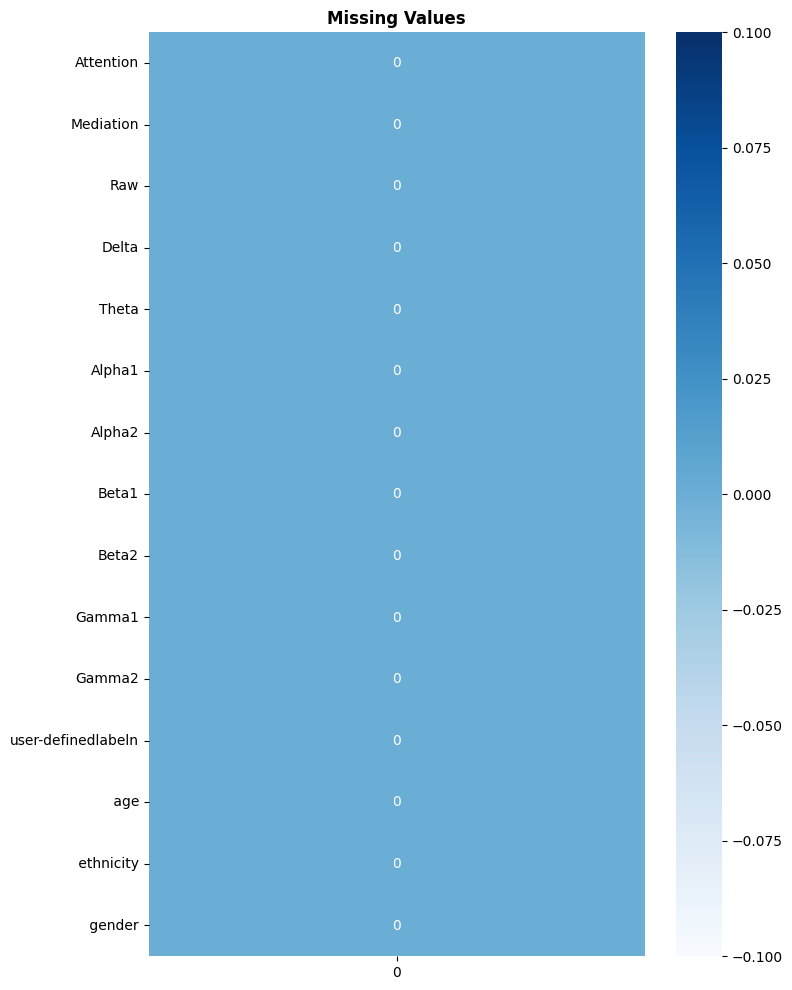

In [49]:
# Checking for missing values
xmpltlb.figure(figsize=(8, 12))
xmpltlb.title('Missing Values', weight='bold')
ax = sns.heatmap(da_ta.isna().sum().to_frame(), annot=True, fmt='d', cmap='Blues')
xmpltlb.show()

In [18]:
#used to removes the columns 'SubjectID,' 'VideoID,' and 'predefinedlabel' from the DataFrame da_ta in-place.
da_ta.drop(['SubjectID','VideoID','predefinedlabel'],axis = 1,inplace=True)

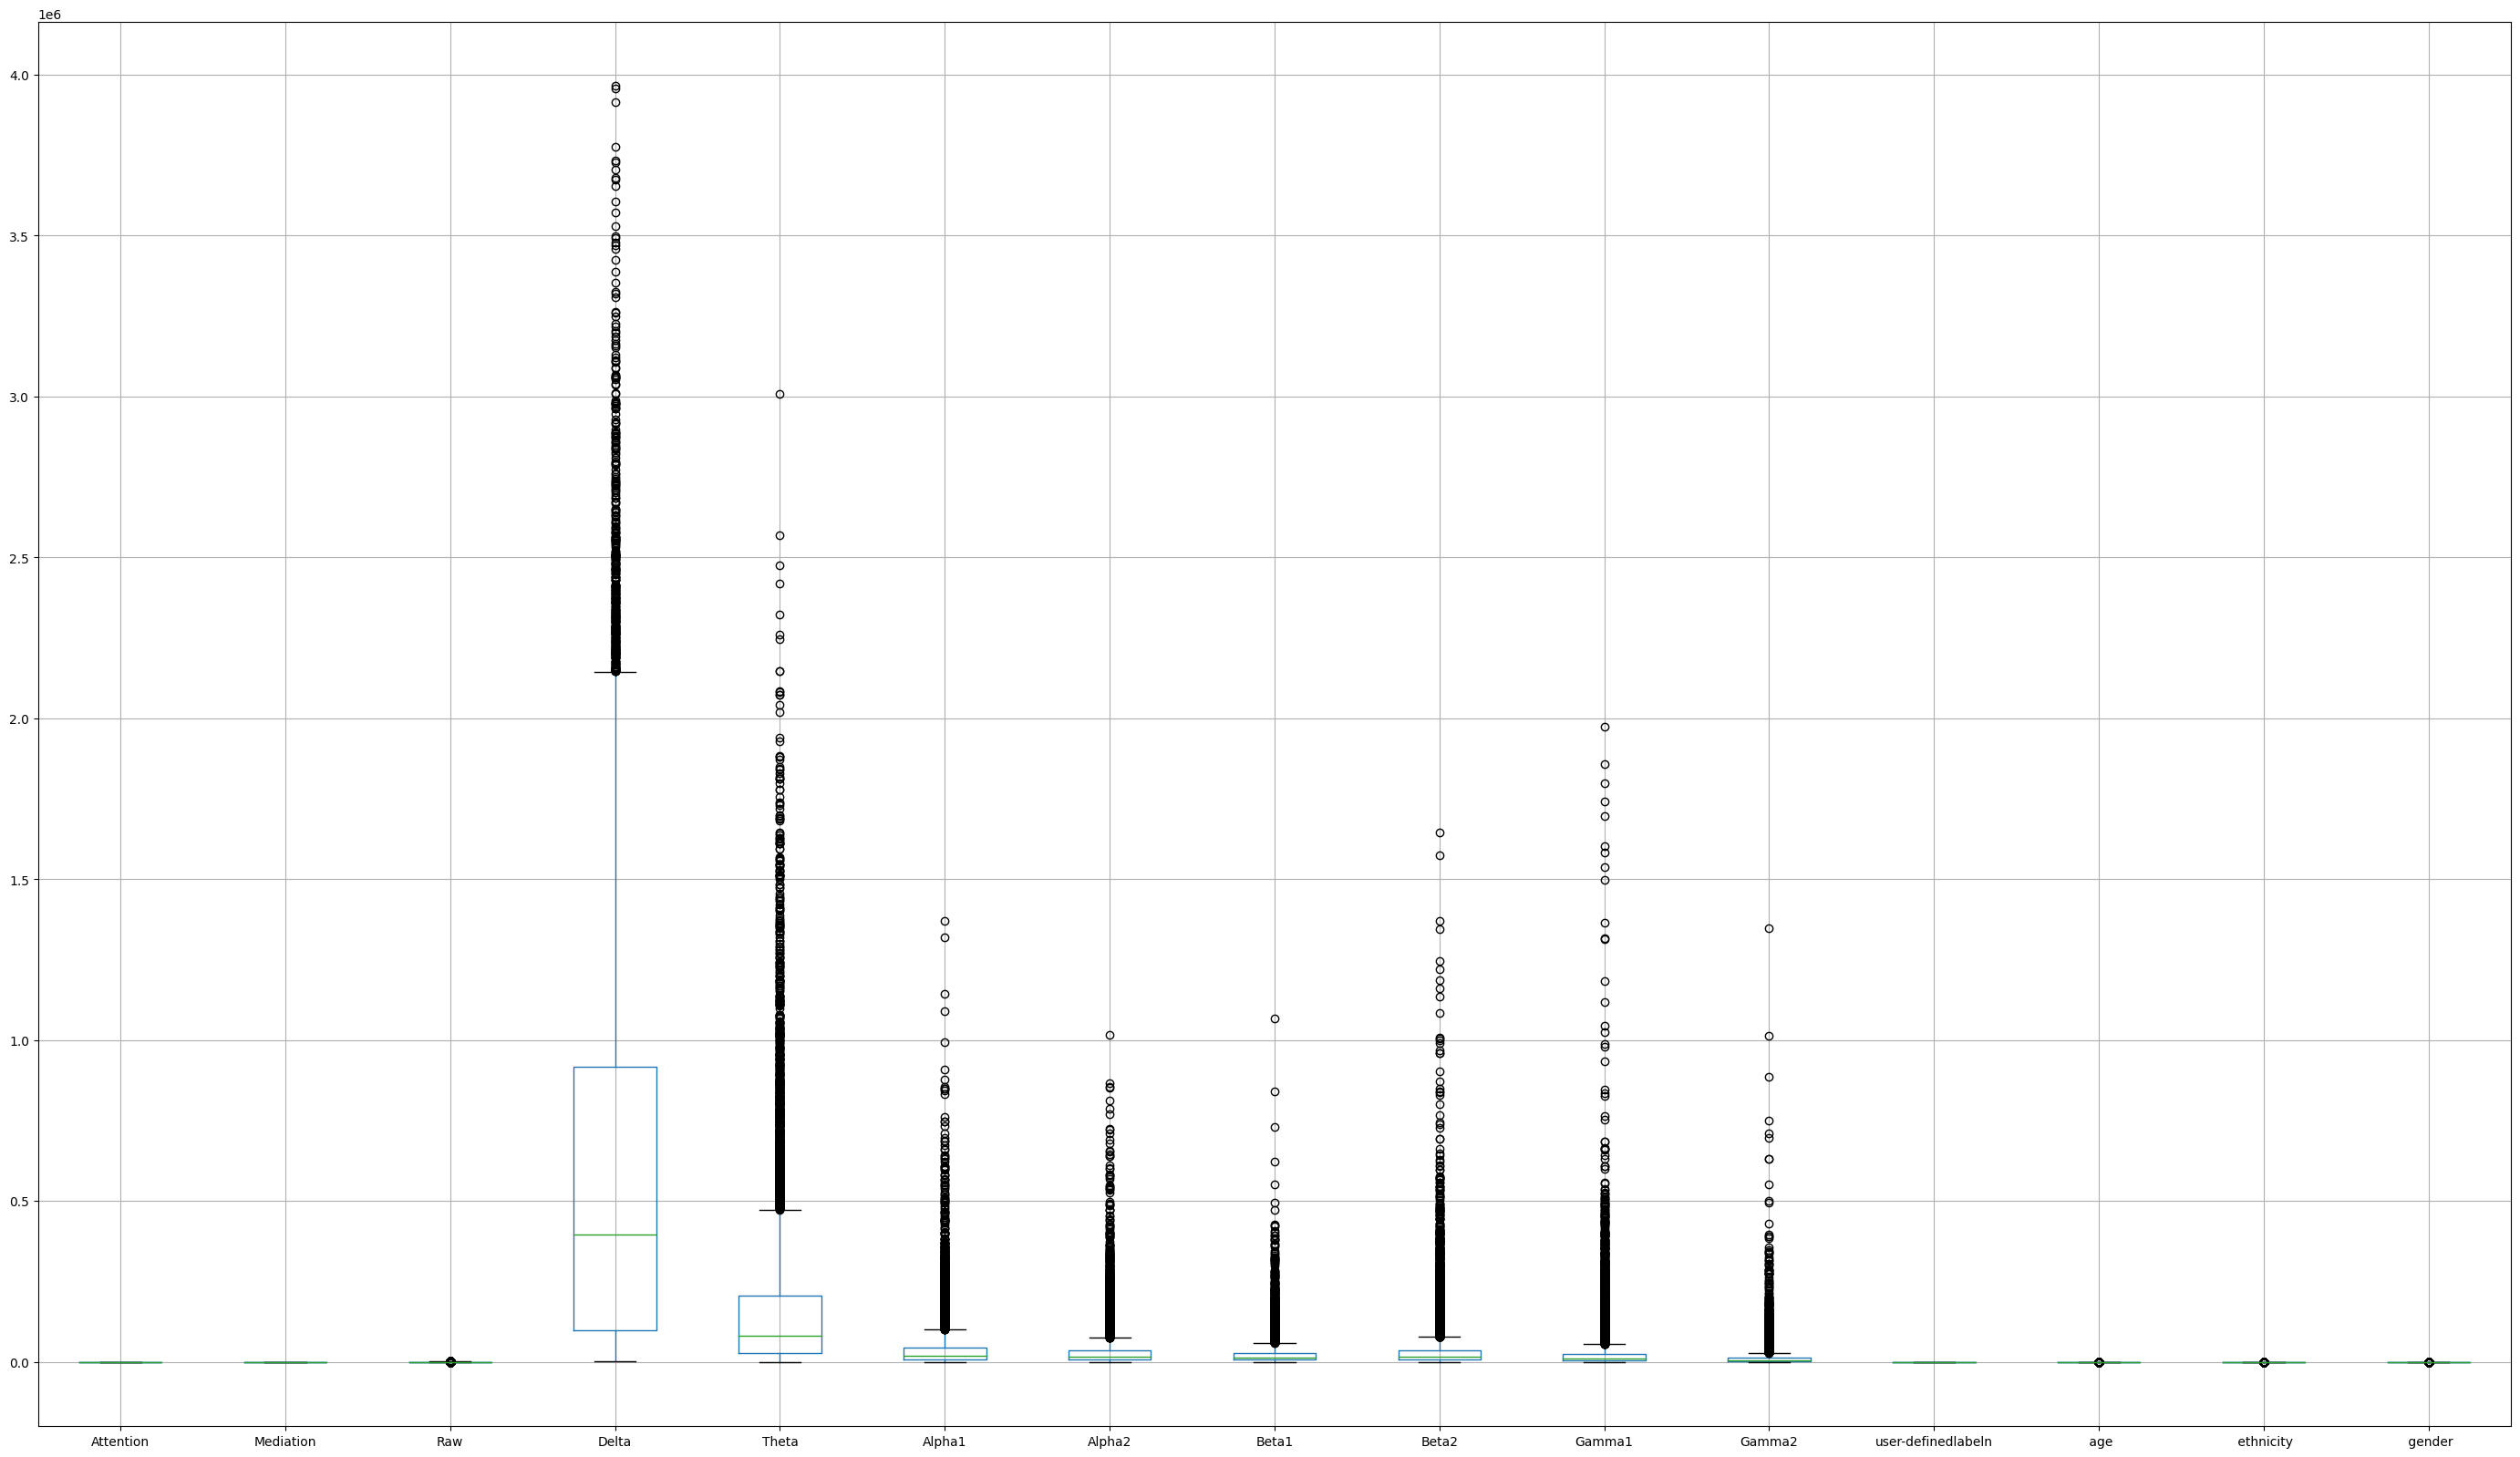

In [19]:
# used to creates a boxplot for all numerical columns in the DataFrame da_ta and displays it with a specified figure size using Matplotlib.
da_ta.boxplot(figsize = (35,20))
xmpltlb.show() #used to display

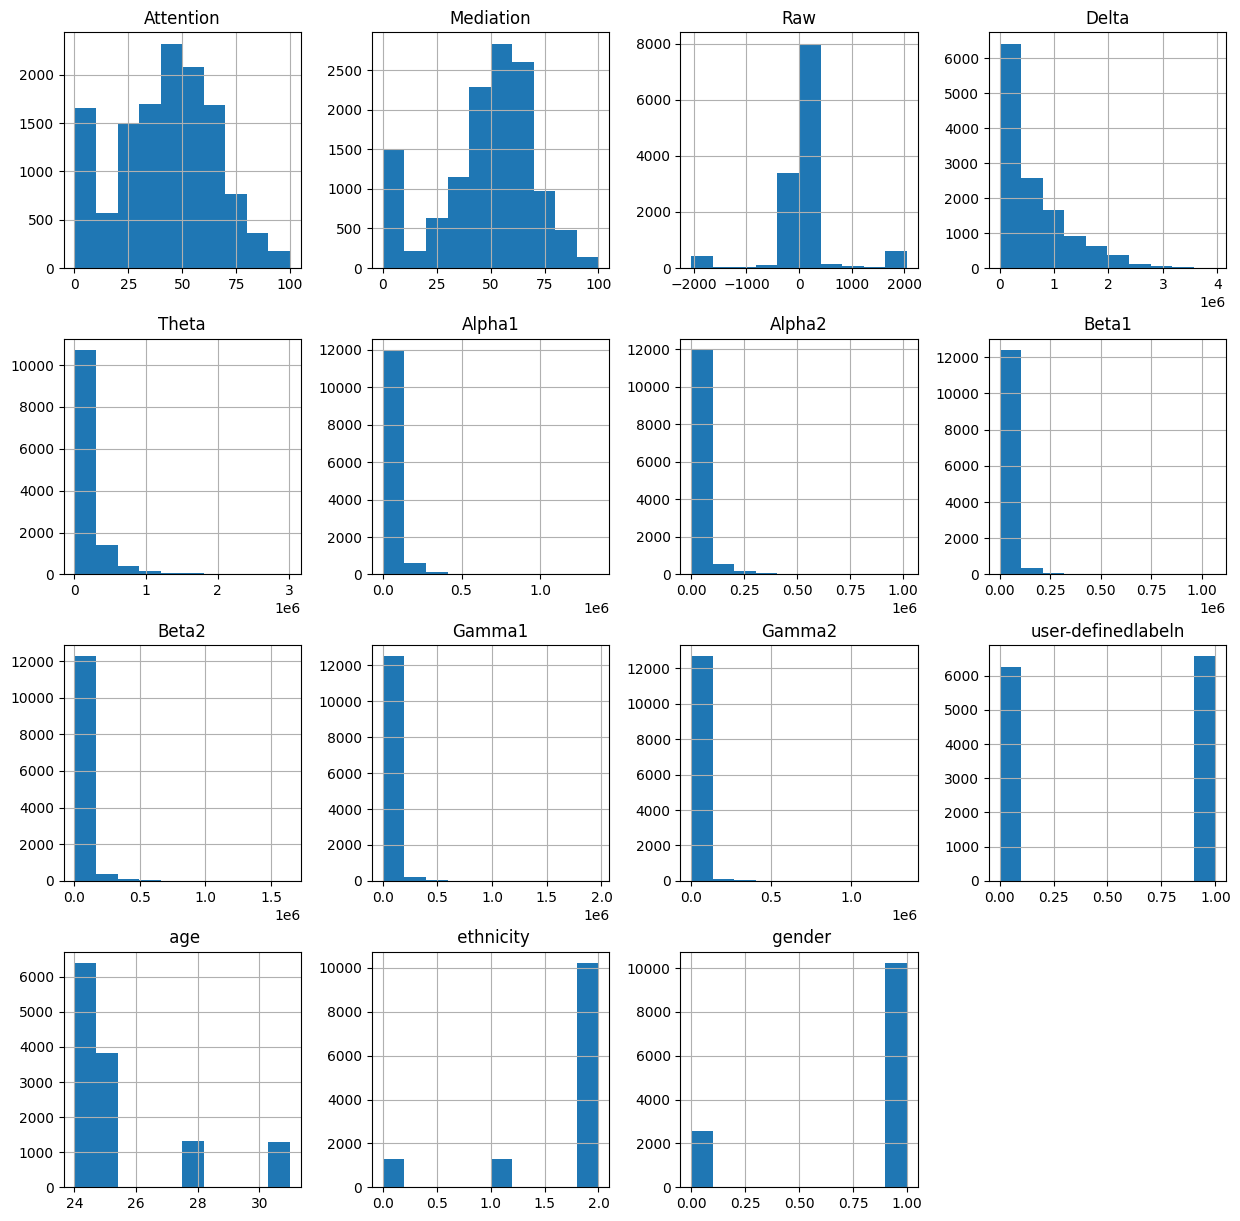

In [20]:
#used to creates histograms for the numerical columns in the DataFrame da_ta and displays them with the specified figure size
da_ta.hist(figsize = (15,15))
xmpltlb.show() #used to display

<Axes: >

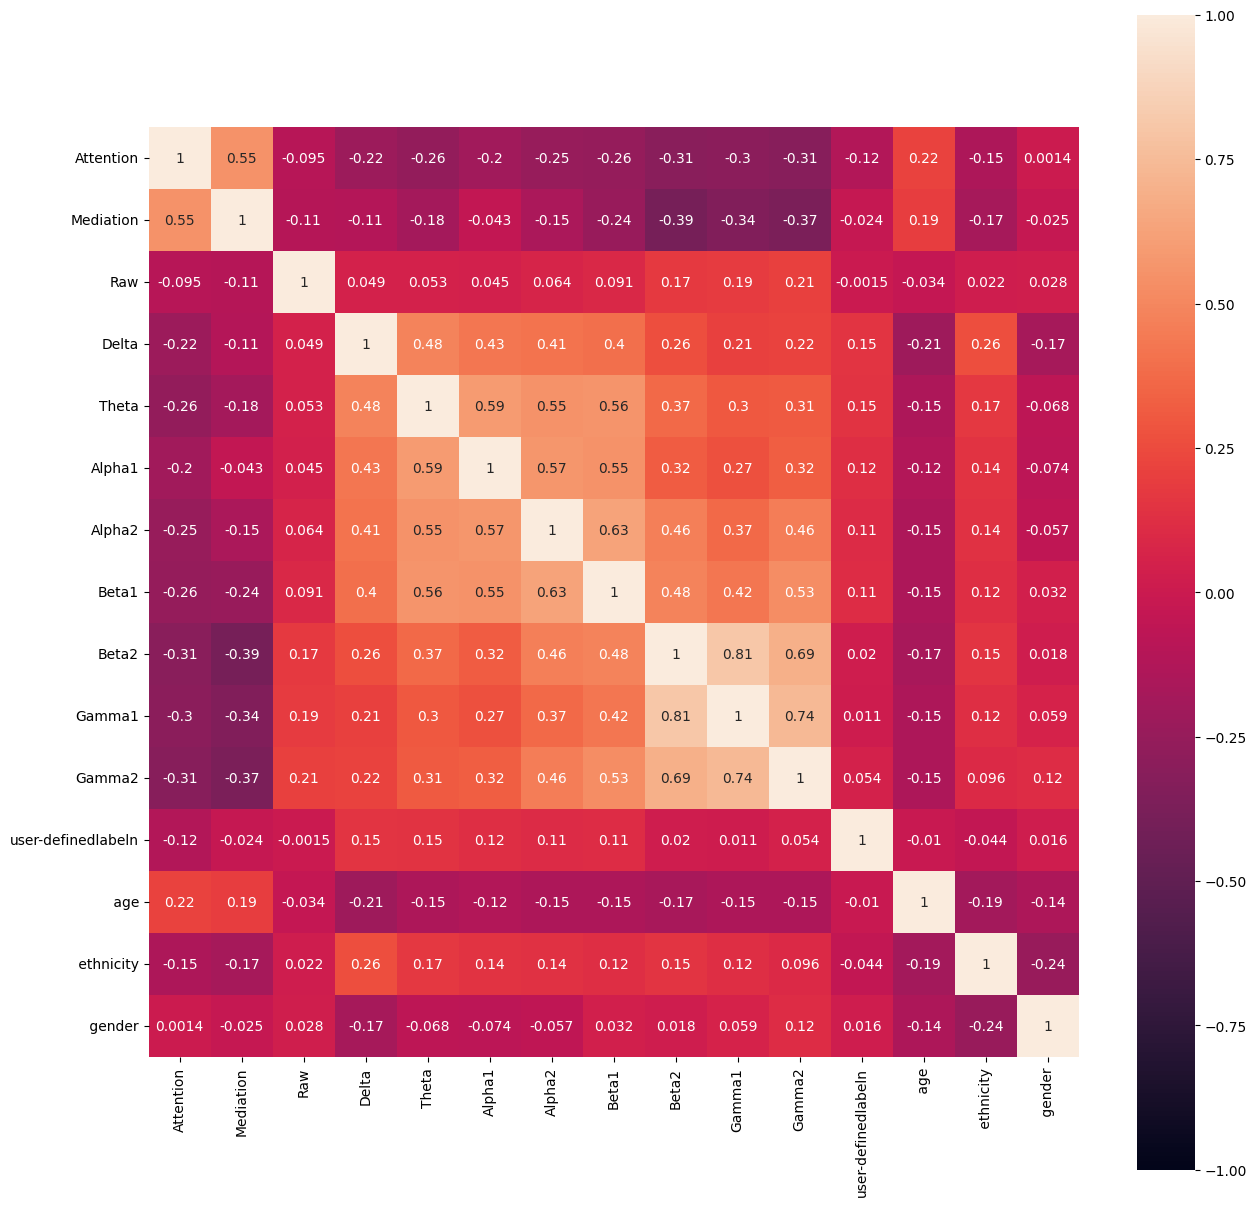

In [21]:
# Setting the figure size for the plot
xmpltlb.figure(figsize = (15,15))

# Calculating the correlation matrix of the data
CoRr_Matrix_X = da_ta.corr()

# Creating a heatmap of the correlation matrix
# vmin is set to -1.0, indicating that the minimum possible correlation is -1
# square is set to True, making each cell of the heatmap square-shaped
# annot is set to True, enabling annotations inside the heatmap cells
sns.heatmap(CoRr_Matrix_X,vmin = -1.0, square=True, annot = True)

In [22]:
# used to da_ta['user-definedlabeln'] = da_ta['user-definedlabeln'].astype(int)
da_ta['user-definedlabeln'] = da_ta['user-definedlabeln'].astype(int)

In [23]:
#used to counts and displays the number of occurrences of each unique value in the 'user-definedlabeln' column of the DataFrame da_ta.
da_ta['user-definedlabeln'].value_counts()

1    6567
0    6244
Name: user-definedlabeln, dtype: int64

In [24]:
# used to assigns the DataFrame da_ta with the 'user-definedlabeln' column removed to the variable X,
# which is typically used to represent the feature matrix in machine learning tasks.
X = (da_ta.drop(['user-definedlabeln'],axis = 1))

In [25]:
# The variable X now contains the DataFrame da_ta with the 'user-definedlabeln' column removed, representing the feature matrix for your data.
X

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,age,ethnicity,gender
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,25,2,1
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,25,2,1
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,25,2,1
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,25,2,1
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,25,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,24,2,0
12807,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,24,2,0
12808,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,24,2,0
12809,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,24,2,0


In [26]:
# used to assigns the column 'user-definedlabeln' from the DataFrame da_ta to the variable y, representing the target or labels for your data.
y = da_ta['user-definedlabeln']

In [27]:
y

0        0
1        0
2        0
3        0
4        0
        ..
12806    0
12807    0
12808    0
12809    0
12810    0
Name: user-definedlabeln, Length: 12811, dtype: int64

In [28]:
# returns the shape of the variable X, which represents the feature matrix in machine learning.
# The output is in the form of (number of rows, number of columns), providing information about the data's structure.
X.shape

(12811, 14)

In [29]:
# returns the shape of the variable y, which typically represents the target or labels in machine learning tasks.
# The output is in the form of (number of rows,), indicating the number of samples or data points in the target variable.
y.shape

(12811,)

In [30]:
# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler to the data and transforming the data
# This will standardize the features to have mean=0 and variance=1
X = scaler.fit_transform(X)

In [31]:

# Defining the shape of the input data
inputs = Input(shape=(14, 1))

# First CNN model
# Applying a 1D convolutional layer with 512 filters of size 3 and ReLU activation function
conv1 = Conv1D(512, 3, activation='relu')(inputs)
# Applying a max pooling operation for temporal data
maxpool1 = MaxPooling1D(pool_size=2, strides=1)(conv1)
# Repeating the process with different parameters
conv3 = Conv1D(256, 2, activation='relu')(maxpool1)
maxpool3 = MaxPooling1D(pool_size=2, strides=1)(conv3)
conv5 = Conv1D(128, 2, activation='relu')(maxpool3)
maxpool5 = MaxPooling1D(pool_size=2, strides=1)(conv5)
conv7 = Conv1D(64, 2, activation='relu')(maxpool5)
maxpool7 = MaxPooling1D(pool_size=2, strides=1)(conv7)

# Second CNN model (similar to the first one but operates independently on the same inputs)
conv2 = Conv1D(512, 3, activation='relu')(inputs)
maxpool2 = MaxPooling1D(pool_size=2, strides=1)(conv2)
conv4 = Conv1D(256, 2, activation='relu')(maxpool2)
maxpool4 = MaxPooling1D(pool_size=2, strides=1)(conv4)
conv6 = Conv1D(128, 2, activation='relu')(maxpool4)
maxpool6 = MaxPooling1D(pool_size=2, strides=1)(conv6)
conv8 = Conv1D(64, 2, activation='relu')(maxpool6)
maxpool8 = MaxPooling1D(pool_size=2, strides=1)(conv8)

# Concatenating the output of the two models
concat = Concatenate()([maxpool7, maxpool8])
# Flattening the output to feed into a Dense layer
flatten = Flatten()(concat)

# Adding a Dense layer with 512 neurons and ReLU activation function
dense = Dense(512, activation='relu')(flatten)
# Adding a Dropout layer to prevent overfitting
dropout = Dropout(0.2)(dense)
# Adding the output layer with a single neuron and sigmoid activation function for binary classification
outputs = Dense(1, activation='sigmoid')(dropout)

# Creating the model
Ensembled = Model(inputs, outputs)



This model is a type of Convolutional Neural Network (CNN), which is commonly used in machine learning for analyzing visual imagery. It’s designed to automatically and adaptively learn spatial hierarchies of features from the input data.

The model starts by defining the shape of the input data, which in this case is a 14x1 array. This could represent, for example, 14 different features of a single data point.

The model then creates two separate CNNs, each consisting of several layers:

A Conv1D layer applies a 1D convolution operation, which can be thought of as a filter or kernel that slides over the input data, performing element-wise multiplication with the part of the input it is currently on, and summing up the results. This operation is repeated across the input data. The number of filters and their size can be adjusted to change the complexity of the model.

A MaxPooling1D layer then reduces the dimensionality of each feature map but retains the most important information. This is done to decrease the computational power required to process the data through dimensionality reduction.

This process is repeated several times with different parameters in each CNN.

The outputs of these two CNNs are then concatenated together and flattened into a single vector. This vector is passed through a Dense layer, also known as a fully connected layer, where every input node is connected to every output node.

Next, a Dropout layer is used to help prevent overfitting, which is when the model learns the training data too well and performs poorly on unseen data. It randomly sets a fraction of input units to 0 at each update during training time.

Finally, an output layer with a single neuron and a sigmoid activation function is used for binary classification. The sigmoid function outputs a value between 0 and 1, which can be interpreted as the probability of the input data point belonging to the positive class.

The entire structure forms an ensemble model that operates on the same inputs but extracts different features through two separate CNNs.

In [32]:
# displays a summary of the architecture and details of the  model defined earlier,
# including information of the layers, output shapes, and the parameters in each layer.
Ensembled.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 14, 1)]              0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 12, 512)              2048      ['input_1[0][0]']             
                                                                                                  
 conv1d_4 (Conv1D)           (None, 12, 512)              2048      ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 11, 512)              0         ['conv1d[0][0]']              
 D)                                                                                           

In [33]:
opmz = Adam(lr=0.001) #Create an Adam optimizer with a learning rate of 0.001 and assign it to the variable opmz.

# Compile the neural network model, specifying the optimizer as 'opmz,' the loss function as 'binary_crossentropy'
# (commonly used for binary classification), and specifying 'accuracy' as the evaluation metric.
Ensembled.compile(optimizer = opmz ,loss = 'binary_crossentropy',metrics = ['accuracy'])

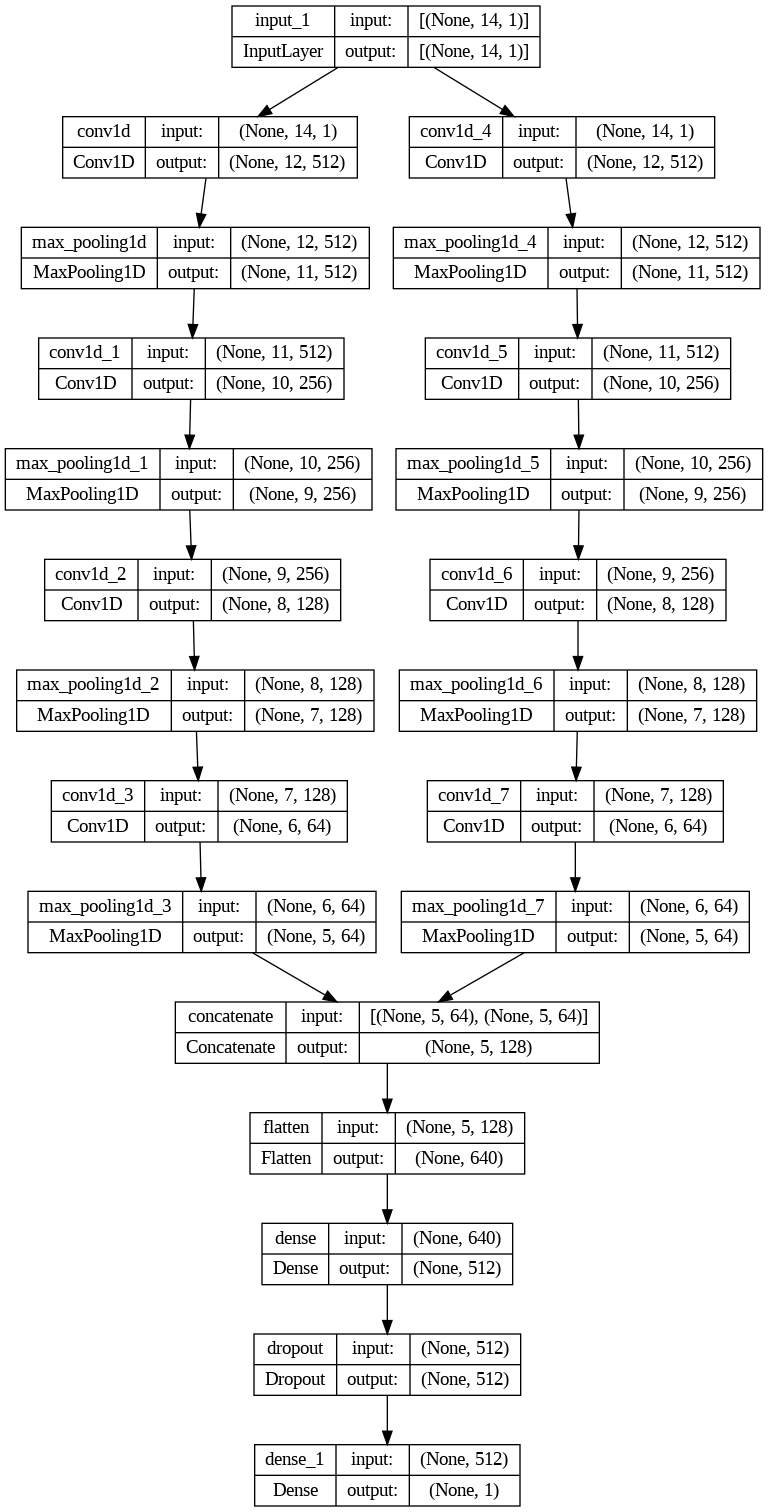

In [34]:
# Using the 'plot_model' function from Keras to create a diagram of the model
# 'model' is the model that you want to visualize
# 'to_file' is the path to save the plot of the model. Here, it is being saved as 'model.png' in the '/tmp' directory
# 'show_shapes' is set to True, which means that output shapes will be shown in the plot
plot_model(Ensembled, to_file='/tmp/model.png', show_shapes=True)

Epoch 1/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.6761 - accuracy: 0.5930
Epoch 2/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.6686 - accuracy: 0.6040
Epoch 3/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.6495 - accuracy: 0.6273
Epoch 4/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.6303 - accuracy: 0.6451
Epoch 5/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.6160 - accuracy: 0.6637
Epoch 6/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.6013 - accuracy: 0.6746
Epoch 7/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.5872 - accuracy: 0.6877
Epoch 8/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.5775 - accuracy: 0.6958
Epoch 9/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.5702 - accuracy: 0.7006
Epoch 10/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.559

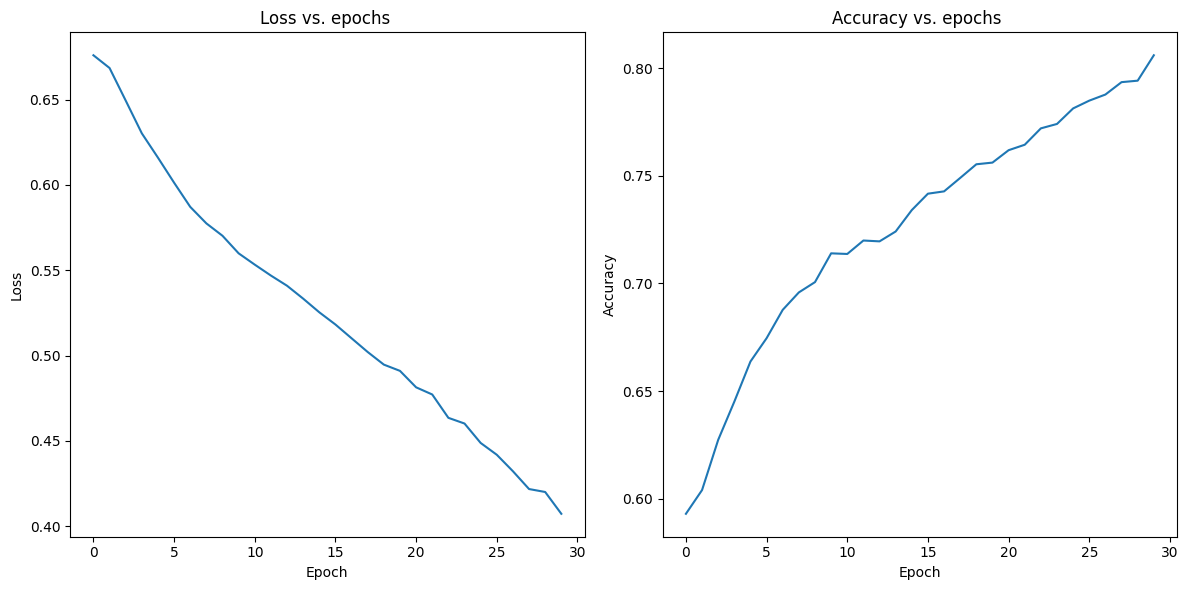

81/81 [==============================] - 1s 4ms/step - loss: 1.0711 - accuracy: 0.5458
Test accuracy for fold 1: 0.5458447337150574
Epoch 1/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.5312 - accuracy: 0.7386
Epoch 2/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.4966 - accuracy: 0.7547
Epoch 3/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.4762 - accuracy: 0.7612
Epoch 4/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.4685 - accuracy: 0.7692
Epoch 5/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.4585 - accuracy: 0.7713
Epoch 6/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.4429 - accuracy: 0.7801
Epoch 7/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.4377 - accuracy: 0.7893
Epoch 8/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.4266 - accuracy: 0.7887
Epoch 9/30
1025/1025 [==============================

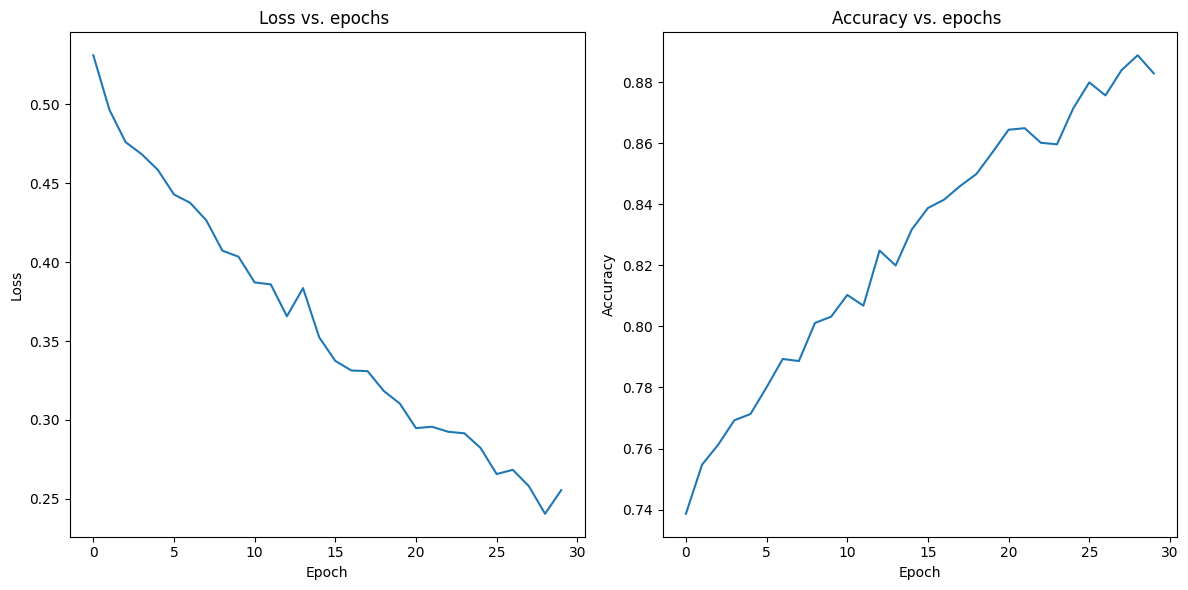

81/81 [==============================] - 0s 4ms/step - loss: 12.5911 - accuracy: 0.4633
Test accuracy for fold 2: 0.4633099138736725
Epoch 1/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.4227 - accuracy: 0.8216
Epoch 2/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.3233 - accuracy: 0.8551
Epoch 3/30
1025/1025 [==============================] - 6s 5ms/step - loss: 0.2976 - accuracy: 0.8654
Epoch 4/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2960 - accuracy: 0.8654
Epoch 5/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2805 - accuracy: 0.8727
Epoch 6/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2682 - accuracy: 0.8753
Epoch 7/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2950 - accuracy: 0.8659
Epoch 8/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2692 - accuracy: 0.8756
Epoch 9/30
1025/1025 [=============================

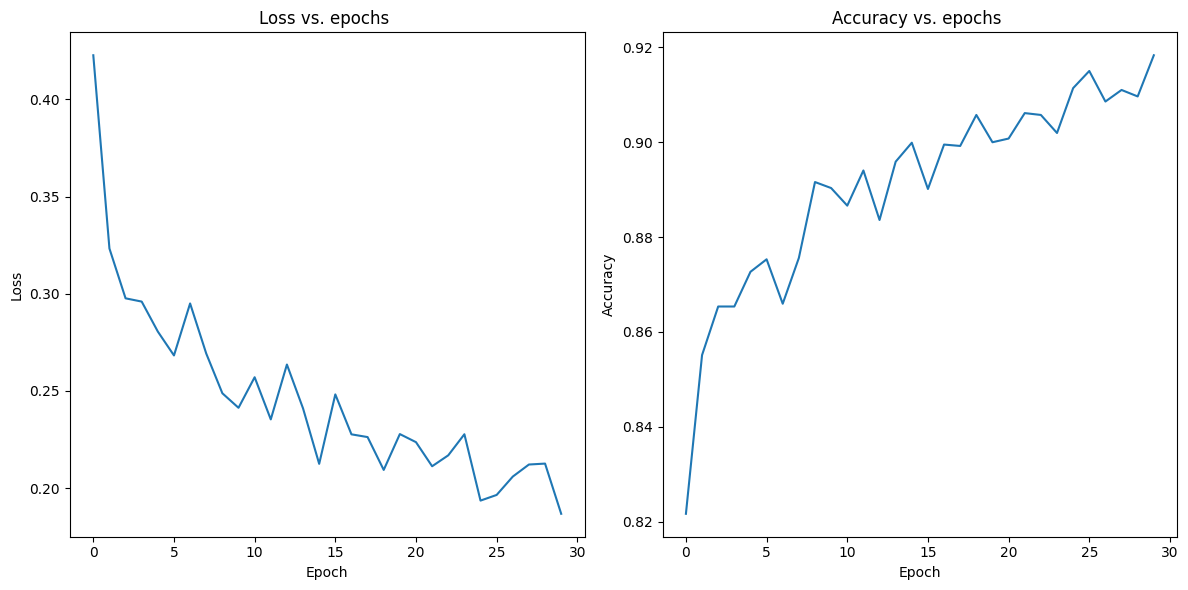

81/81 [==============================] - 0s 3ms/step - loss: 9.7272 - accuracy: 0.6546
Test accuracy for fold 3: 0.654566764831543
Epoch 1/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.3929 - accuracy: 0.8364
Epoch 2/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2840 - accuracy: 0.8714
Epoch 3/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2706 - accuracy: 0.8785
Epoch 4/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2760 - accuracy: 0.8763
Epoch 5/30
1025/1025 [==============================] - 6s 5ms/step - loss: 0.2773 - accuracy: 0.8756
Epoch 6/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2599 - accuracy: 0.8804
Epoch 7/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2414 - accuracy: 0.8895
Epoch 8/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2558 - accuracy: 0.8894
Epoch 9/30
1025/1025 [==============================]

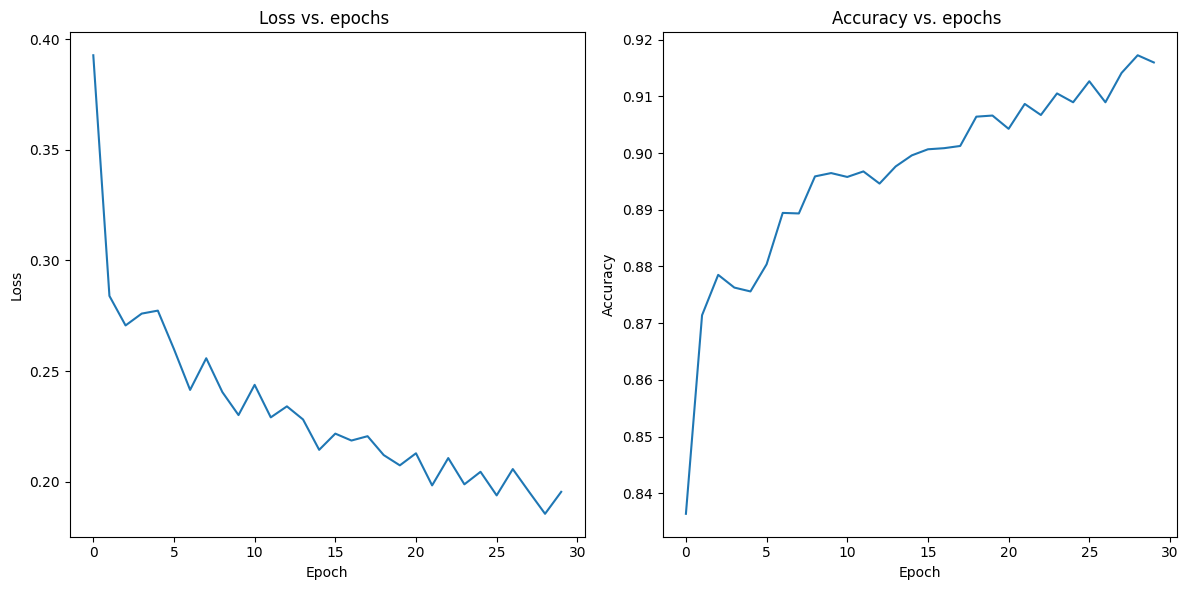

81/81 [==============================] - 0s 3ms/step - loss: 1.4945 - accuracy: 0.7748
Test accuracy for fold 4: 0.7747853398323059
Epoch 1/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.3746 - accuracy: 0.8446
Epoch 2/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2667 - accuracy: 0.8797
Epoch 3/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2586 - accuracy: 0.8808
Epoch 4/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2555 - accuracy: 0.8853
Epoch 5/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2393 - accuracy: 0.8936
Epoch 6/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2394 - accuracy: 0.8911
Epoch 7/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2297 - accuracy: 0.8964
Epoch 8/30
1025/1025 [==============================] - 6s 6ms/step - loss: 0.2403 - accuracy: 0.8951
Epoch 9/30
1025/1025 [==============================

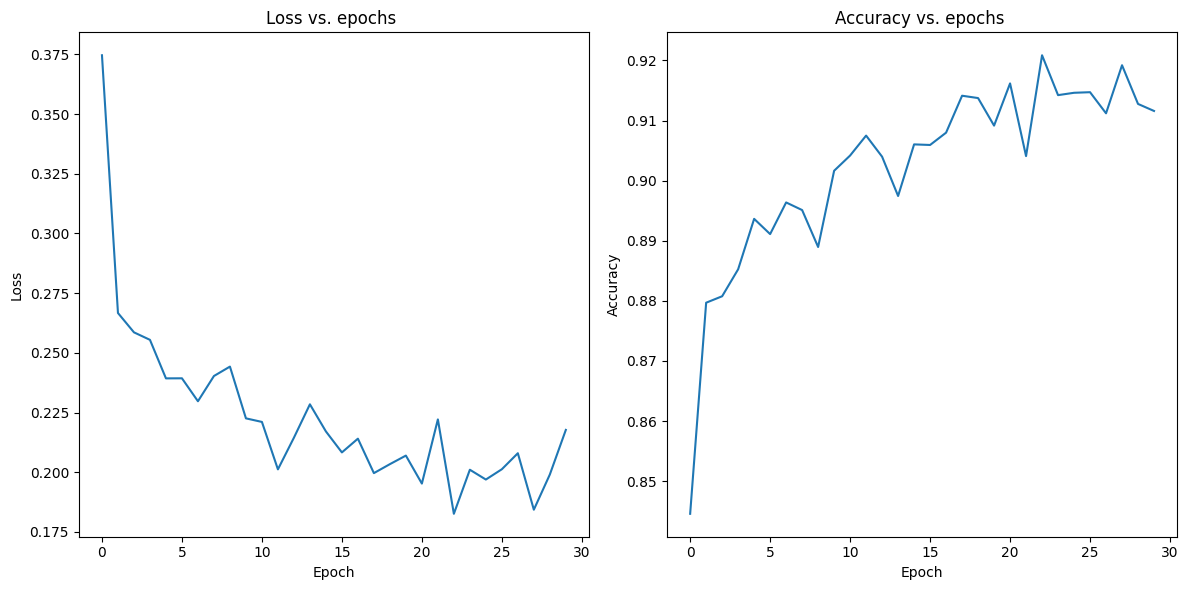

81/81 [==============================] - 0s 3ms/step - loss: 0.2867 - accuracy: 0.9153
Test accuracy for fold 5: 0.9153005480766296


In [36]:
# Initialize variables to store the best model and its accuracy
best_accuracy = 0
best_model = None
best_fold_train_data = None
best_fold_test_data = None

# Use StratifiedKFold for splitting the data into 4 folds
skf = StratifiedKFold(n_splits=5)

# Loop over each fold
for i, (Tr_ain_ind_ex, te_st_ind_ex) in enumerate(skf.split(X, y)):
    # Splitting the entire data into training and testing sets for the fold
    train_X_data, train_X_labels = X[Tr_ain_ind_ex], X[te_st_ind_ex]
    train_y_data, train_y_labels = y[Tr_ain_ind_ex], y[te_st_ind_ex]

    # Train the model on this fold's training data
    history = Ensembled.fit(train_X_data, train_y_data, epochs=30, batch_size=10)

    # Plot the training loss and accuracy over each epoch
    xmpltlb.figure(figsize=(12, 6)) # Creating a new figure with specified size (width=12, height=6)

    xmpltlb.subplot(1, 2, 1) # Creating the first subplot in a 1x2 grid (this will be the left one)
    xmpltlb.plot(history.history['loss'], label='Training Loss') # Plotting the training loss values stored in 'history.history['loss']'
    xmpltlb.title(f'Loss vs. epochs ') # Setting the title of this subplot
    xmpltlb.ylabel('Loss') # Setting the label of the y-axis
    xmpltlb.xlabel('Epoch') # Setting the label of the x-axis

    xmpltlb.subplot(1, 2, 2) # Creating the second subplot in a 1x2 grid (this will be the right one)
    xmpltlb.plot(history.history['accuracy'], label='Training Accuracy') # Plotting the training accuracy values stored in 'history.history['accuracy']'
    xmpltlb.title(f'Accuracy vs. epochs ') # Setting the title of this subplot
    xmpltlb.ylabel('Accuracy') # Setting the label of the y-axis
    xmpltlb.xlabel('Epoch') # Setting the label of the x-axis

    xmpltlb.tight_layout()# Adjusting the layout so that plots do not overlap

    xmpltlb.show()# Displaying the figure with two subplots


    # Evaluatint the model on this fold's test_ing data
    te_st_loss, te_st_accuracy = Ensembled.evaluate(train_X_labels, train_y_labels)

    # If this model has better accuracy then save it
    if te_st_accuracy > best_accuracy:
        best_accuracy = te_st_accuracy
        best_model = Ensembled
        best_fold_train_data = (train_X_data, train_y_data)
        best_fold_test_data = (train_X_labels, train_y_labels)

    # Print the te_st accuracy for this fold
    print(f'Test accuracy for fold {i+1}: {te_st_accuracy}')


In [37]:
# Assigning the training data from the best fold to 'X_train_best' and 'y_train_best'
X_train_best, y_train_best = best_fold_train_data

# Assigning the test data from the best fold to 'X_test_best' and 'y_test_best'
X_test_best, y_test_best = best_fold_test_data

In [38]:
# Predict the training data

# Use the best model to predict the classes of the training data
train_predictions = best_model.predict(X_train_best)

# Convert the predictions to class labels by taking the index of the maximum value in each prediction
train_predictions_classes = np.argmax(train_predictions, axis=1)

# Convert the predictions to binary format (0 or 1) based on a threshold of 0.5
y_pr_ed_train = (train_predictions > 0.5).astype(int)


321/321 [==============================] - 1s 2ms/step


In [39]:
# Predict the testing data

# Use the best model to predict the classes of the test data
test_predictions = best_model.predict(X_test_best)

# Convert the predictions to class labels by taking the index of the maximum value in each prediction
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Convert the predictions to binary format (0 or 1) based on a threshold of 0.5
y_pr_ed_test = (test_predictions > 0.5).astype(int)



81/81 [==============================] - 0s 2ms/step


In [40]:


# Calculate evaluation metrics
training_x_accuracy = metrics.accuracy_score(y_train_best, y_pr_ed_train)
print(f"Accuracy: {training_x_accuracy}")

# Calculating the precision of the model on the training data.
training_x_precision = precision_score(y_train_best, y_pr_ed_train, average='weighted')
print("Precision: ", training_x_precision)

# Calculating the recall of the model on the training data. Recall (Sensitivity) - the ratio of correctly predicted positive observations to all observations in actual class
training_x_recall = recall_score(y_train_best, y_pr_ed_train, average='weighted')
print("Recall: ", training_x_recall)

# Calculating the F1 score of the model on the training data.
training_x_f1 = f1_score(y_train_best, y_pr_ed_train, average='weighted')
print("F1 Score: ", training_x_f1)


Accuracy: 0.9405795687384135
Precision:  0.9417810912174749
Recall:  0.9405795687384135
F1 Score:  0.9405792757148204


In [41]:
# Calculate evaluation metrics
testing_x_accuracy = metrics.accuracy_score(y_test_best, y_pr_ed_test)
print(f"Accuracy: {testing_x_accuracy}")

# Calculating the precision of the model on the training data.
testing_x_precision = precision_score(y_test_best, y_pr_ed_test, average='weighted')
print("Precision: ", testing_x_precision)

# Calculating the recall of the model on the training data. Recall (Sensitivity) - the ratio of correctly predicted positive observations to all observations in actual class
testing_x_recall = recall_score(y_test_best, y_pr_ed_test, average='weighted')
print("Recall: ", testing_x_recall)

# Calculating the F1 score of the model on the training data.
testing_x_f1 = f1_score(y_test_best, y_pr_ed_test, average='weighted')
print("F1 Score: ", testing_x_f1)


Accuracy: 0.9153005464480874
Precision:  0.915596563568658
Recall:  0.9153005464480874
F1 Score:  0.9153145498371467


In [42]:
# Print the shape of the training labels
print("Shape of y_train: ", y_train_best.shape)

# Print the unique values in the training labels
print("Unique values in y_train: ", np.unique(y_train_best))

# Print the shape of the predicted training labels
print("Shape of y_pred_train: ", y_pr_ed_train.shape)

# Print the unique values in the predicted test labels
print("Unique values in y_pred_test: ", np.unique(y_pr_ed_test))


Shape of y_train:  (10249,)
Unique values in y_train:  [0 1]
Shape of y_pred_train:  (10249, 1)
Unique values in y_pred_test:  [0 1]


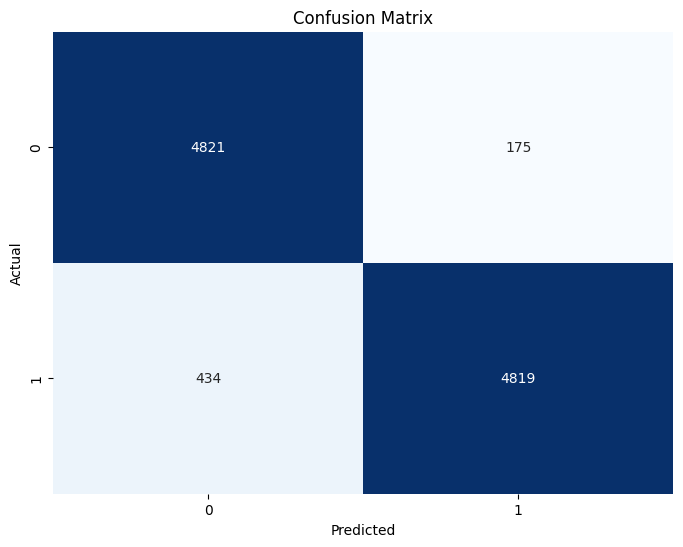

In [43]:
# Calculate the confusion matrix for the training data
confusion_mat = confusion_matrix(y_train_best, y_pr_ed_train)

# Create a new figure for the heatmap
xmpltlb.figure(figsize=(8, 6))

# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set the labels for the x and y axes
xmpltlb.xlabel('Predicted')
xmpltlb.ylabel('Actual')

# Set the title for the plot
xmpltlb.title('Confusion Matrix')

# Display the plot
xmpltlb.show()


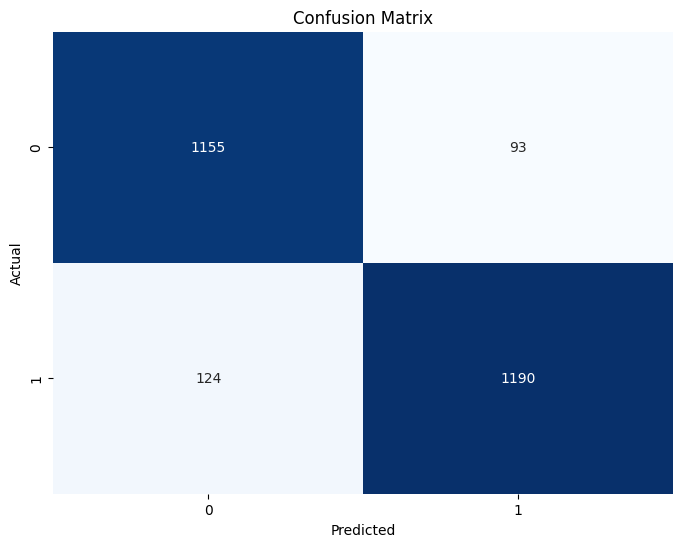

In [44]:
# Calculate the confusion matrix for the test data
confusion_mat = confusion_matrix(y_test_best, y_pr_ed_test)

# Create a new figure for the heatmap
xmpltlb.figure(figsize=(8, 6))

# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set the labels for the x and y axes
xmpltlb.xlabel('Predicted')
xmpltlb.ylabel('Actual')

# Set the title for the plot
xmpltlb.title('Confusion Matrix')

# Display the plot
xmpltlb.show()


In [45]:
# Generate the classification report
class_report = classification_report(y_test_best, y_pr_ed_test)

# Print the classification report
print("Classification Report on Test Data:\n", class_report)

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      1248
           1       0.93      0.91      0.92      1314

    accuracy                           0.92      2562
   macro avg       0.92      0.92      0.92      2562
weighted avg       0.92      0.92      0.92      2562



In [46]:
# Generate the classification report for training data
train_class_report = classification_report(y_train_best, y_pr_ed_train)

# Print the classification report for training data
print("Training Data Classification Report:\n", train_class_report)

Training Data Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      4996
           1       0.96      0.92      0.94      5253

    accuracy                           0.94     10249
   macro avg       0.94      0.94      0.94     10249
weighted avg       0.94      0.94      0.94     10249



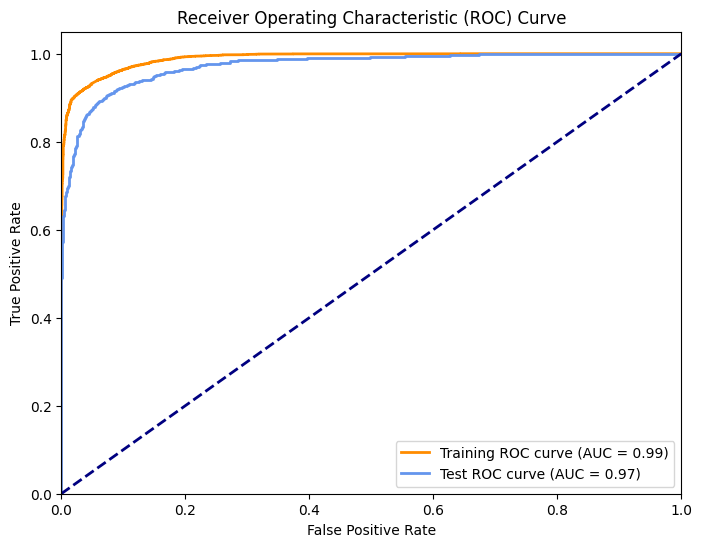

ROC AUC Score for Training Data: 0.99
ROC AUC Score for Test Data: 0.97


In [47]:


# Compute ROC curve and AUC for training data
# This is done by comparing the true labels and the predicted probabilities for the training data
fpr_train, tpr_train, _ = roc_curve(y_train_best, train_predictions)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and AUC for test data
# This is done by comparing the true labels and the predicted probabilities for the test data
fpr_test, tpr_test, _ = roc_curve(y_test_best, test_predictions)
roc_auc_test = auc(fpr_test, tpr_test)

# Compute ROC AUC score for training and test data
# The ROC AUC score is a single number summary of the classifier performance
roc_auc_score_train = roc_auc_score(y_train_best, train_predictions)
roc_auc_score_test = roc_auc_score(y_test_best, test_predictions)

# Plot ROC curve for training and test data
# The ROC curve is a graphical representation of the trade off between the true positive rate and false positive rate for every possible cut off
xmpltlb.figure(figsize=(8, 6))
xmpltlb.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Training ROC curve (AUC = {roc_auc_train:.2f})')
xmpltlb.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
xmpltlb.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # This is the line representing random guessing
xmpltlb.xlim([0.0, 1.0])
xmpltlb.ylim([0.0, 1.05])
xmpltlb.xlabel('False Positive Rate') # False positive rate is on x-axis
xmpltlb.ylabel('True Positive Rate') # True positive rate is on y-axis
xmpltlb.title('Receiver Operating Characteristic (ROC) Curve') # Title of the plot
xmpltlb.legend(loc='lower right')
xmpltlb.show()

# Print ROC AUC scores for training and test data
# These are the final results we are interested in. They tell us how well our classifier is doing.
print(f"ROC AUC Score for Training Data: {roc_auc_score_train:.2f}")
print(f"ROC AUC Score for Test Data: {roc_auc_score_test:.2f}")
